In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
X=np.load("X.npy")
Y=np.load("Y.npy")

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [5]:
input_size = 100
hidden_size = 200
num_classes = 500
num_epochs = 5
batch_size = 100
learning_rate = 0.0001

In [6]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(p=.4)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.dropout(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        return out

In [7]:
model = Net(input_size,hidden_size,num_classes)
model.cuda()
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
X_train.shape[0]//10

293

In [10]:
Y_train.shape

(2936,)

In [11]:
epochs = 1000

In [13]:
X_train[:-6].shape

(2930, 100)

In [14]:
# test
losses=[]
dev_set_loss=[]
for epoch in range(epochs):
    
    epoch +=1
    for x,y in zip(np.split(X_train[:-6],X_train.shape[0]//10,axis=0),np.split(Y_train[:-6],Y_train.shape[0]//10,axis=0)):
        
        x=torch.from_numpy(x)
        y=torch.from_numpy(y)

        inputs = Variable(x.type(torch.cuda.FloatTensor))
        labels = Variable(y.type(torch.cuda.LongTensor))

        #clear grads
        optimizer.zero_grad()
        #forward to get predicted values
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)

#         # let's check the state of dev set
        
#         inputs_dev = Variable(torch.from_numpy(X_dev).type(torch.cuda.FloatTensor))
#         labels_dev = Variable(torch.from_numpy(Y_dev).type(torch.cuda.LongTensor))
        
#         outputs_dev=model.forward(inputs_dev)
        
#         dev_set_loss.append(criterion(outputs_dev,labels_dev))


        losses.append(float(loss))
        loss.backward()# back props
        optimizer.step()# update the parameters
    if(epoch%10 == 0):
        print("{} : {}".format(epoch,float(loss)))

10 : 1.9487292766571045
20 : 1.9371833801269531
30 : 1.9519903659820557
40 : 1.804044485092163
50 : 2.133953809738159
60 : 2.2504703998565674
70 : 1.9855839014053345
80 : 1.5686806440353394
90 : 1.5845364332199097
100 : 1.6748218536376953
110 : 1.756394624710083
120 : 1.8751875162124634
130 : 1.6740293502807617
140 : 1.7810783386230469
150 : 1.8121726512908936
160 : 1.673094391822815
170 : 1.5088783502578735
180 : 1.7905080318450928
190 : 1.8641427755355835
200 : 1.7346950769424438
210 : 1.6917330026626587
220 : 1.3419077396392822
230 : 2.022068977355957
240 : 1.6388171911239624
250 : 1.6291544437408447
260 : 1.8542896509170532
270 : 1.8274052143096924
280 : 1.7875665426254272
290 : 1.587560772895813
300 : 1.7024551630020142
310 : 1.7503461837768555
320 : 1.7545913457870483
330 : 1.714766263961792
340 : 1.4150859117507935
350 : 1.9452095031738281
360 : 1.2383304834365845
370 : 1.4364306926727295
380 : 1.7348623275756836
390 : 1.5328106880187988
400 : 1.3418476581573486
410 : 1.56937086

## Evaluate the performance on the training data

In [15]:
# X_train and Y_train
model_pred=model(Variable(torch.from_numpy(X_train).type(torch.cuda.FloatTensor)))

train_correct=0
Y_train_pred=[]
total_train_compounds=len(Y_train)
for i,train_compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(train_compound,0)
    Y_train_pred.append(int(max_index))
    if (int(max_index)==Y_train[i]):
        train_correct+=1

print("The train accuracy is {}".format((train_correct/total_train_compounds)*100))

The train accuracy is 84.53678474114442


## Evaluate the model on the testing data

In [16]:
# X_test and Y_test
model_pred_test=model(Variable(torch.from_numpy(X_test).type(torch.cuda.FloatTensor)))

# The test accuracy
test_correct=0
Y_test_pred=[]
total_test_compounds=len(Y_test)
for i,test_compound in enumerate(model_pred_test):
    
    
    max_,max_index=torch.max(test_compound,0)
    Y_test_pred.append(int(max_index))
    if (int(max_index)==Y_test[i]):
        test_correct+=1

print("The test accuracy is {}".format((test_correct/total_test_compounds)*100))

The test accuracy is 71.55963302752293


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
## Saved , uncomment the below line if you want to save it
# np.save("Y_test",Y_test)
# np.save("Y_test_pred.npy",np.array(Y_test_pred))

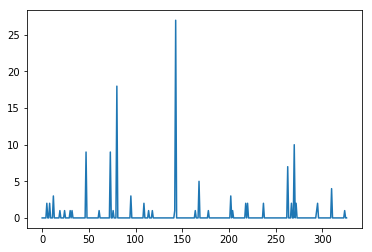

In [19]:
plt.plot(Y_test_pred)

In [20]:
## For the entire dataset

In [21]:
#X and Y
model_pred=model(Variable(torch.from_numpy(X).type(torch.cuda.FloatTensor)))
correct=0
Y_pred=[]
total_compounds=len(Y)
for i,compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(compound,0)
    Y_pred.append(int(max_index))
    if (int(max_index)==Y[i]):
        correct+=1

print("The total accuracy is {}".format((correct/total_compounds)*100))

The total accuracy is 83.69598528961079


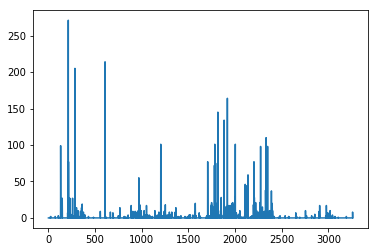

In [22]:
plt.plot(Y_pred)